In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [4]:
df = pd.read_csv('/content/drive/MyDrive/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
# 数値データのみを取得
df_numeric = df.select_dtypes(include='number')
# 年齢列を削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)  
# 標準化
x_scaled = scaler.fit_transform(_df)
x_scaled[0]


array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [7]:
from sklearn.cluster import KMeans

# クラスラリングの実行
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# クラスタリングの結果を追加
df['cluster'] = kmeans.labels_
df.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,2
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)

In [9]:
feature = pca.fit_transform(x_scaled)
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df, feature_df], axis=1)
new_data.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster,総合評価,ホテルの環境評価,接客の評価
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,2,-1.637654,0.645483,-0.390539
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0,0.286120,3.307718,-1.719181


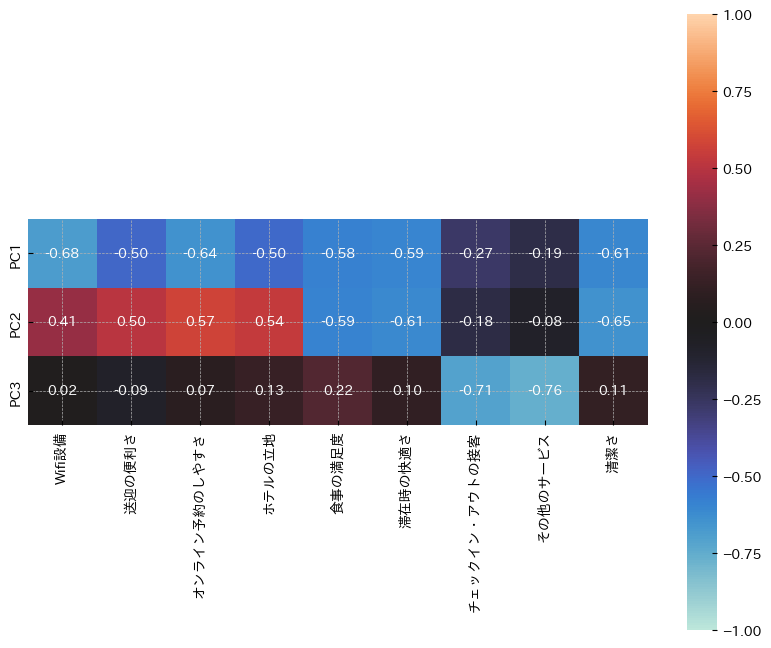

In [10]:
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

In [14]:
new_data

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster,総合評価,ホテルの環境評価,接客の評価
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,2,-1.637654,0.645483,-0.390539
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0,0.286120,3.307718,-1.719181
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,0,2.570091,0.054585,1.248974
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3,2,-0.985539,0.149397,-0.283761
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4,2,-1.121424,-0.404443,-0.405535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,女性,41,グループ,学生,3,2,2,2,3,3,3,2,3,3,1,1.139608,-0.335433,0.983323
9996,男性,60,個人,学生,2,4,2,1,4,4,2,1,4,3,1,0.697536,-1.178860,2.190154
9997,男性,33,グループ,学生,5,5,5,5,4,4,3,5,4,5,2,-2.983633,1.413486,-0.215989
9998,女性,22,グループ,旅行,5,5,5,5,5,5,1,3,5,5,2,-3.355063,0.759978,2.318835


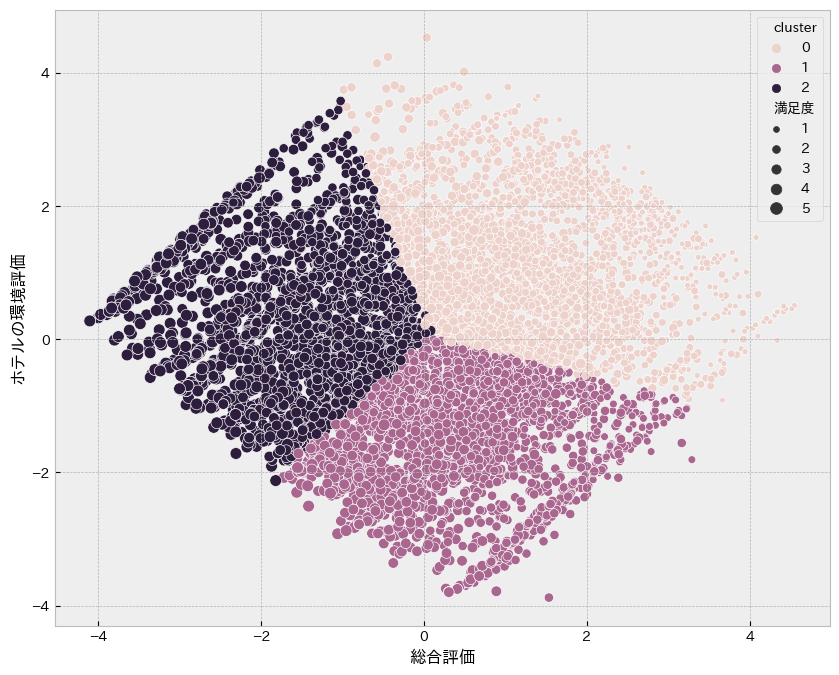

In [13]:
sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

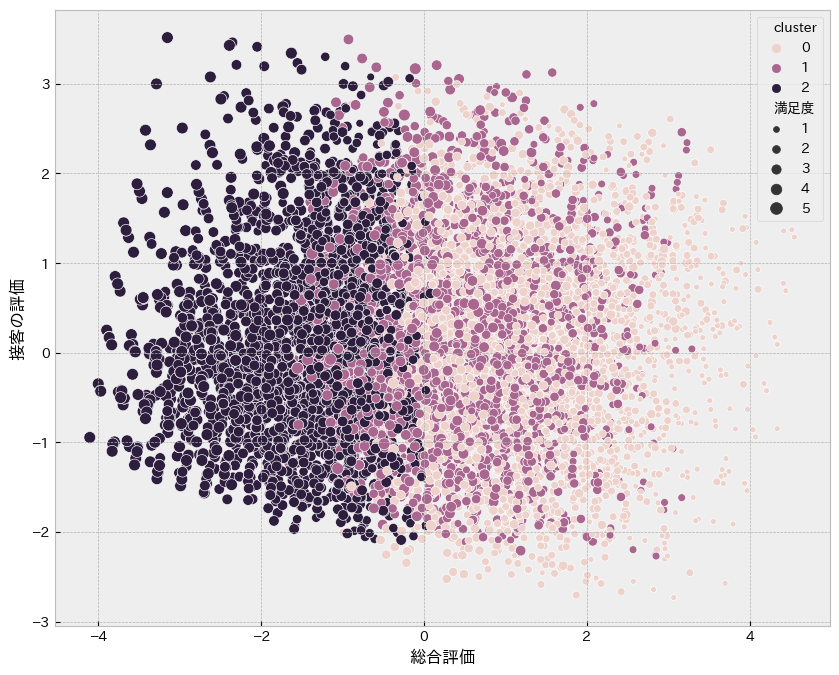

In [12]:
sns.scatterplot(x='総合評価', y='接客の評価', hue='cluster', size='満足度', data=new_data);

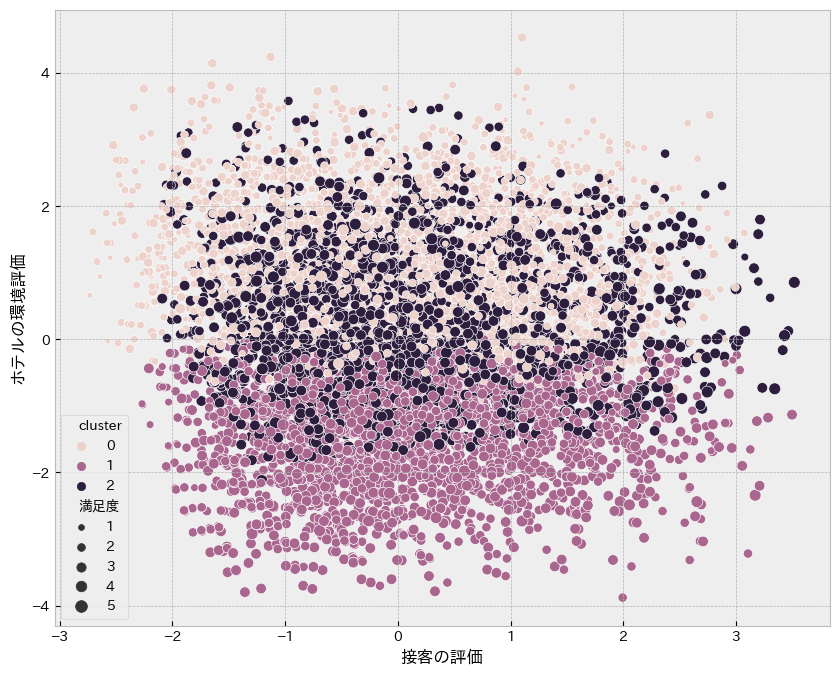

In [13]:
sns.scatterplot(x='接客の評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

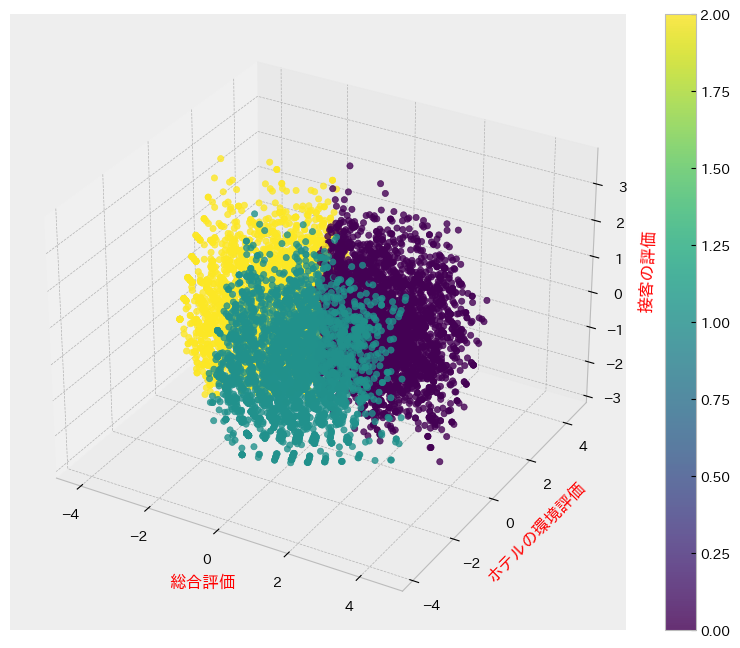

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_data['総合評価'],
    new_data['ホテルの環境評価'],
    new_data['接客の評価'],  
    alpha=0.8,
    c=list(new_data['cluster'])
)

cbar = fig.colorbar(scatter)

ax.set_xlabel('総合評価', c='r')
ax.set_ylabel('ホテルの環境評価', c='r')
ax.set_zlabel('接客の評価', c='r')

plt.show();